In [1]:
import torch
import torchaudio
import torchaudio.transforms as T


In [ ]:
clean_path = './data/LibriSpeech/train-clean-100/19/198/19-198-0000.flac'
clean_wave, clean_rate = torchaudio.load(clean_path)
print(clean_wave.shape, clean_rate)

mixed_path = './mixed_audio_example.flac'
mixed_wave, mixed_rate = torchaudio.load(mixed_path)
print(mixed_wave.shape, mixed_rate)

torch.Size([1, 31440]) 16000
torch.Size([1, 31440]) 16000


In [ ]:
N_FFT = 512  # 표준 프레임 크기인 25ms는 16000 * 0.025 = 400 샘플보다 큰 2의 거듭제곱
HOP_LENGTH = int(clean_rate * 0.01)  # 16000 Hz에서 10ms(0.01초)에 해당하는 샘플 수

spectrogram_transform = T.Spectrogram(n_fft=N_FFT, hop_length=HOP_LENGTH)

In [ ]:
spectrogram_clean = spectrogram_transform(clean_wave)
print(spectrogram_clean)

tensor([[[3.1026e-03, 1.2198e-01, 1.4974e-01,  ..., 1.7071e-01,
          4.6717e-02, 2.0779e-01],
         [3.9119e-02, 1.3206e-01, 1.3602e-01,  ..., 1.3641e-01,
          1.1019e-01, 1.4344e-01],
         [2.6721e-02, 2.8555e-02, 1.2034e-02,  ..., 1.9399e-02,
          1.3387e-02, 1.0132e-02],
         ...,
         [4.6389e-05, 1.5209e-05, 1.0126e-06,  ..., 5.4661e-06,
          1.4659e-05, 8.4293e-06],
         [1.2885e-05, 1.5048e-05, 4.0547e-07,  ..., 4.4345e-06,
          2.6608e-05, 1.7560e-05],
         [3.4447e-08, 6.9586e-06, 8.9525e-07,  ..., 8.8144e-08,
          4.3850e-05, 7.8358e-05]]])


In [20]:
amplitude_to_dB_transform = T.AmplitudeToDB(stype='power')
log_spec_clean = amplitude_to_dB_transform(spectrogram_clean)
print(log_spec_clean.shape)
print(log_spec_clean[0])

torch.Size([1, 257, 197])
tensor([[-25.0827,  -9.1370,  -8.2466,  ...,  -7.6773, -13.3052,  -6.8238],
        [-14.0762,  -8.7923,  -8.6638,  ...,  -8.6515,  -9.5785,  -8.4333],
        [-15.7315, -15.4432, -19.1961,  ..., -17.1223, -18.7331, -19.9431],
        ...,
        [-43.3358, -48.1789, -59.9455,  ..., -52.6232, -48.3388, -50.7421],
        [-48.8993, -48.2252, -63.9204,  ..., -53.5315, -45.7498, -47.5547],
        [-74.6285, -51.5748, -60.4805,  ..., -70.5481, -43.5803, -41.0592]])


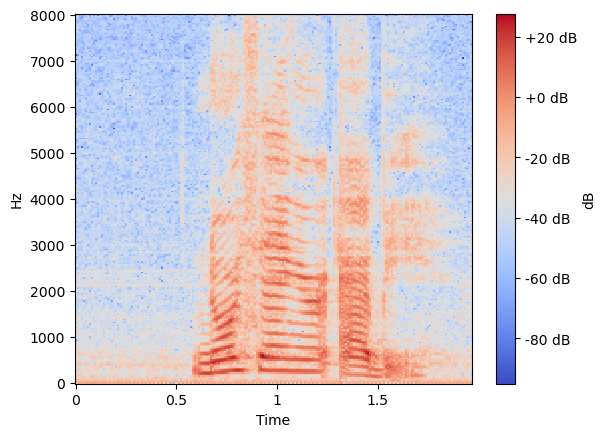

In [ ]:
import librosa
import matplotlib.pyplot as plt

spec_clean_visualize = log_spec_clean[0].numpy()
librosa.display.specshow(spec_clean_visualize, 
                         sr=clean_rate, 
                         hop_length=HOP_LENGTH, 
                         x_axis='time', 
                         y_axis='linear')

# 컬러바
cbar = plt.colorbar(format='%+2.0f dB')
cbar.set_label('dB')

plt.show()

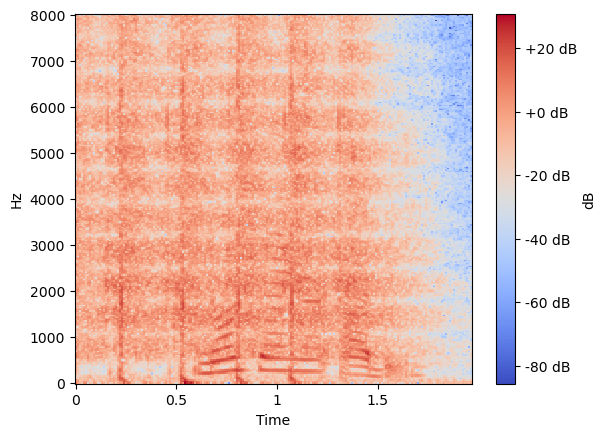

In [ ]:
# mixed
spectrogram_mixed = spectrogram_transform(mixed_wave)
log_spec_mixed = amplitude_to_dB_transform(spectrogram_mixed)

spec_mixed_visualize = log_spec_mixed[0].numpy()
librosa.display.specshow(spec_mixed_visualize, 
                         sr=mixed_rate, 
                         hop_length=HOP_LENGTH, 
                         x_axis='time', 
                         y_axis='linear')
cbar = plt.colorbar(format='%+2.0f dB')
cbar.set_label('dB')

plt.show()

tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [2.9965e-02, 1.0116e-01, 1.0420e-01,  ..., 1.0449e-01,
          8.4408e-02, 1.0987e-01],
         [9.1535e-03, 3.0901e-02, 3.1829e-02,  ..., 3.1919e-02,
          2.5784e-02, 3.3564e-02],
         ...,
         [1.1352e-04, 3.7022e-05, 2.2276e-05,  ..., 2.7094e-05,
          5.5869e-05, 5.9267e-05],
         [1.8527e-04, 1.1949e-04, 5.1402e-05,  ..., 5.2797e-05,
          5.2380e-05, 5.3318e-05],
         [1.0781e-04, 6.5853e-05, 3.8928e-05,  ..., 4.9548e-05,
          3.2026e-05, 3.3661e-05]]])


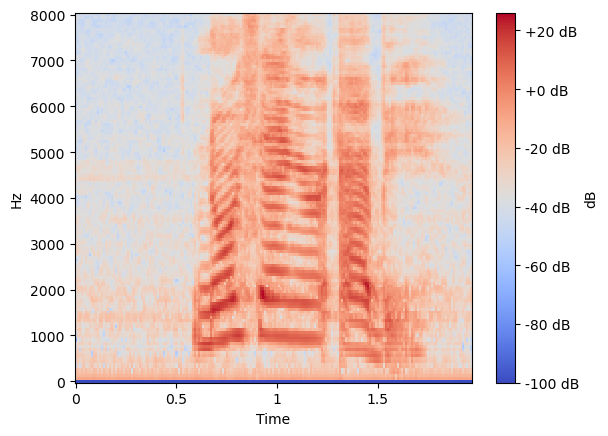

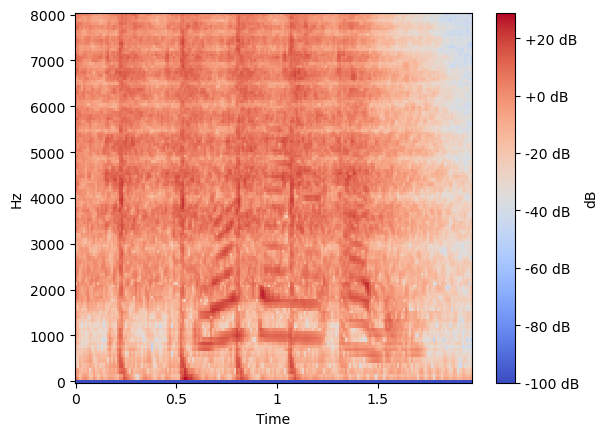

In [ ]:
# mel spectogram
mel_spec_transf = T.MelSpectrogram(n_fft=N_FFT, hop_length=HOP_LENGTH)

mel_spec_clean = mel_spec_transf(clean_wave)
mel_spec_mixed = mel_spec_transf(mixed_wave)

log_melspec_clean = amplitude_to_dB_transform(mel_spec_clean)
log_melspec_mixed = amplitude_to_dB_transform(mel_spec_mixed)

print(mel_spec_clean)

spec_clean_visualize = log_melspec_clean[0].numpy()
librosa.display.specshow(spec_clean_visualize, 
                         sr=clean_rate, 
                         hop_length=HOP_LENGTH, 
                         x_axis='time', 
                         y_axis='linear')

# 컬러바
cbar = plt.colorbar(format='%+2.0f dB')
cbar.set_label('dB')

plt.show()


spec_mixed_visualize = log_melspec_mixed[0].numpy()
librosa.display.specshow(spec_mixed_visualize, 
                         sr=mixed_rate, 
                         hop_length=HOP_LENGTH, 
                         x_axis='time', 
                         y_axis='linear')
cbar = plt.colorbar(format='%+2.0f dB')
cbar.set_label('dB')

plt.show()

torch.Size([2, 36000])
torch.Size([1, 36000])


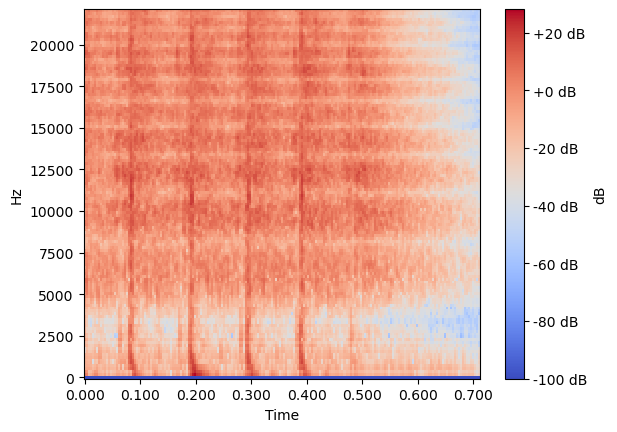

In [ ]:
import random

# noise
noise_path = './data/noise_datasets/urbansound8k/audio/fold1/7061-6-0-0.wav'
noise_wave, noise_rate = torchaudio.load(noise_path)

# sampling rate 통일
noise_wave = torchaudio.transforms.Resample(orig_freq = noise_rate, new_freq = clean_rate)(noise_wave)

# 채널 수 통일
noise_wave = torch.mean(noise_wave, dim = 0, keepdim = True)

# 길이 통일
clean_len = clean_wave.shape[-1]
noise_len = noise_wave.shape[-1]

if clean_len > noise_len:
    repeat_factor = clean_len // noise_len + 1
    noise_wave = torch.cat([noise_wave] * repeat_factor, dim = 1)
    noise_wave = noise_wave[..., :clean_len ]

elif clean_len < noise_len:
    start_idx = random.randint(0, noise_len - clean_len)
    noise_wave = noise_wave[..., start_idx:start_idx + clean_len]

else: clean_wave, noise_wave

# mel spectogram
mel_spec_noise = mel_spec_transf(noise_wave)
log_melspec_noise = amplitude_to_dB_transform(mel_spec_noise)

spec_noise_visualize = log_melspec_noise[0].numpy()
librosa.display.specshow(spec_noise_visualize, 
                         sr=noise_rate, 
                         hop_length=HOP_LENGTH, 
                         x_axis='time', 
                         y_axis='linear')
cbar = plt.colorbar(format='%+2.0f dB')
cbar.set_label('dB')

plt.show()
